In [13]:
library(tidyverse)
library(ggplot2)
library(forecast)
library(astsa) 
library(xts)
library(tseries)
library(fpp2)
library(fma)
library(lubridate)
library(tidyverse)
library(TSstudio)
library(quantmod)
library(tidyquant)
library(plotly)
library(ggplot2)
library(gridExtra)
library(readxl)
library(imputeTS)

# Crude Oil Production

Rows: 23 Columns: 1


-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (1): x

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in ggplot2::geom_segment(lineend = "butt", ...):
"Ignoring unknown parameters: `main`"


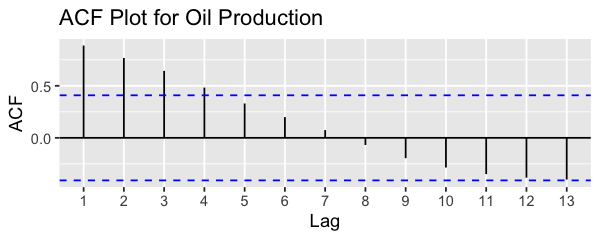

In [14]:
#| echo: true
#| message: false
#| code-fold: true
#| code-summary: "Plot ACF"
#| warning: false

# Import dataset
ts_oil_production <- read_csv('./data/ts_oil_production.csv')

# Create time series
ts_oil_production<-ts(ts_oil_production$x,star=decimal_date(as.Date("2000-01-01",format = "%Y-%m-%d")),frequency = 1)

# Resize plots
options(repr.plot.width = 5, repr.plot.height = 2) 

# ACF Plot
acf_oil_production <- ggAcf(ts_oil_production, main="ACF Plot for Oil Production")

acf_oil_production

In [15]:
# Save differenced time series
diff_oil_production <- diff(ts_oil_production)

# Keep differenced Time Series
ts_oil_production <- diff_oil_production

In [16]:
xt <- ts_oil_production

# PACF plot parameter selection
p_value <- 3

# Number of differences
d_value <- 1

# ACF plot parameter selection
q_value <- 4

# Initialize variable
i <- 1

# Initialize variable
temp <- data.frame()

# Calculate number of rows
rows <- p_value*d_value*q_value

# 
ls <- matrix(rep(NA,6*rows),nrow=rows) 

# Parameter testing loop
for (p in 1:p_value+1)
{
  for(q in 1:q_value+1)
  {
    for(d in 1:d_value)
    {
      
      if(p-1+d+q-1<=8) #usual threshold
      {
        
        model<- Arima(xt,order=c(p-1,d,q-1),include.drift=TRUE) 
        ls[i,]= c(p-1,d,q-1,model$aic,model$bic,model$aicc)
        i=i+1
        #print(i)
        
      }
      
    }
  }
}

temp <- as.data.frame(ls)

names(temp) <- c("p","d","q","AIC","BIC","AICc")

#temp
#knitr::kable(temp)

temp

p,d,q,AIC,BIC,AICc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,317.8510,322.0291,320.3510
1,1,2,315.6034,320.8260,319.6034
1,1,3,316.3897,322.6568,322.3897
1,1,4,317.8762,325.1879,326.4916
2,1,1,312.3736,317.5962,316.3736
2,1,2,314.2722,320.5394,320.2722
2,1,3,315.4608,322.7724,324.0762
2,1,4,315.8170,324.1732,327.8170
3,1,1,313.4332,319.7004,319.4332


In [17]:
AIC <- temp[which.min(temp$AIC),]

p1 <- AIC$p
d1 <- AIC$d
q1 <- AIC$q

AIC

,p,d,q,AIC,BIC,AICc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,2,1,1,312.3736,317.5962,316.3736


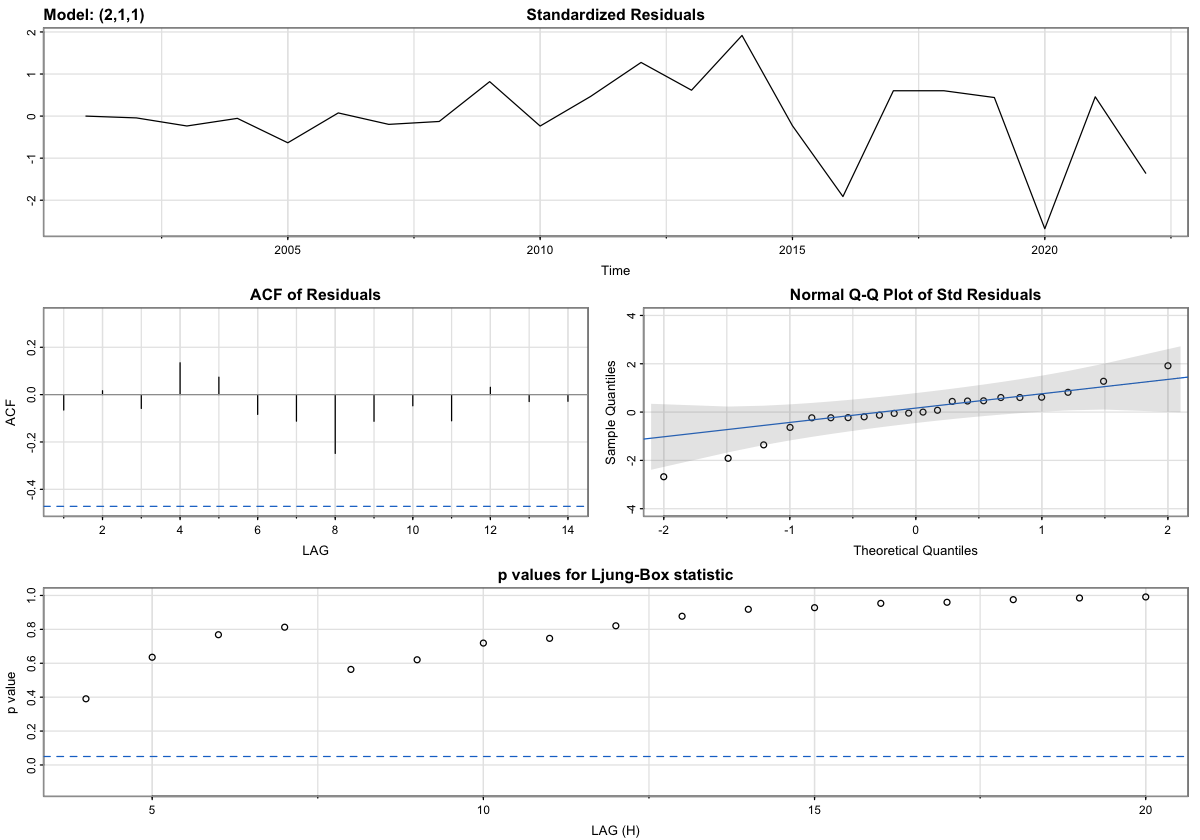

In [18]:
par(bg = "white")

options(repr.plot.width = 10, repr.plot.height = 7) 

model_output <- capture.output(sarima(xt, p1, d1, q1))

In [28]:
AIC <- Arima(xt,order=c(p1, d1, q1),include.drift = TRUE)

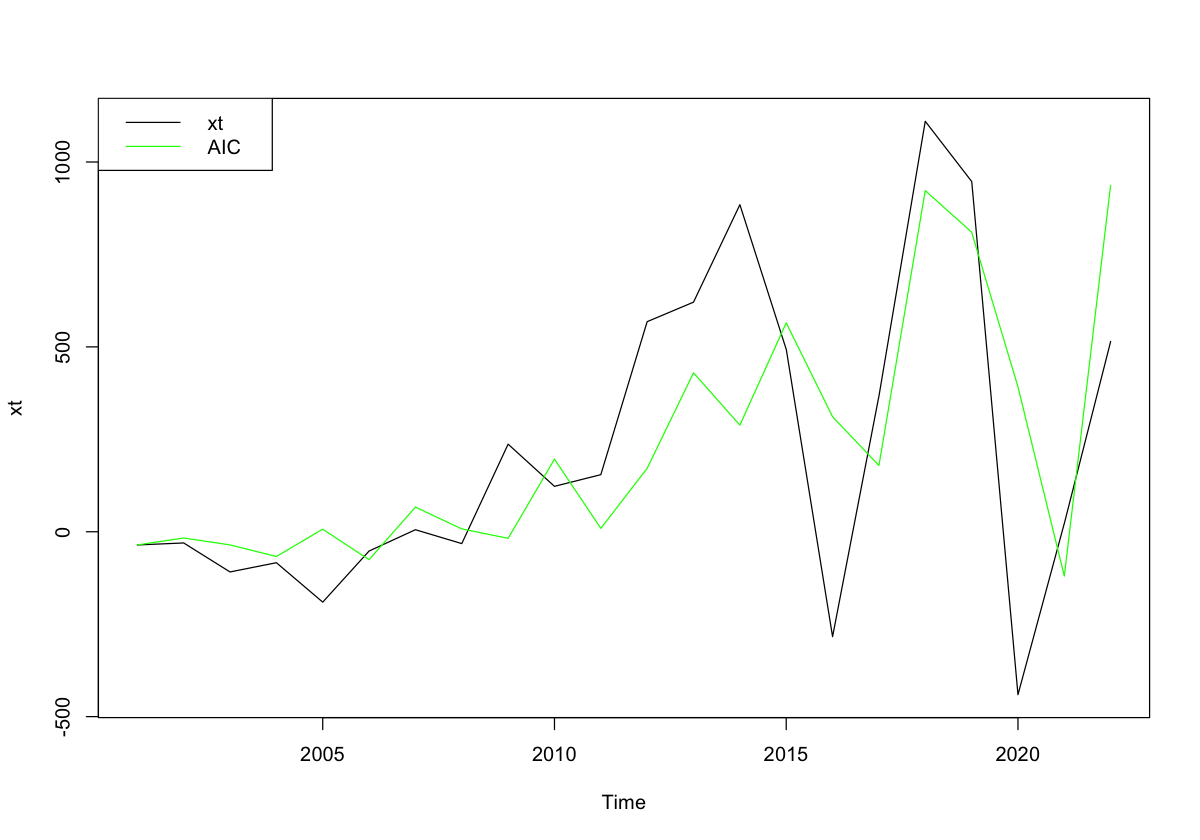

In [42]:
par(bg = "white")

plot(xt, col="black")
lines(fitted(AIC), col="green")
legend(x = "topleft", legend = c("xt", "AIC"), col = c("black", "green"), lty = 1)


In [21]:
fit <- Arima(xt, order=c(p1, d1, q1))
summary(fit)

Series: xt 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2      ma1
      0.1832  -0.6324  -0.4982
s.e.  0.2034   0.1577   0.2241

sigma^2 = 118852:  log likelihood = -151.6
AIC=311.2   AICc=313.7   BIC=315.38

Training set error measures:
                   ME    RMSE      MAE      MPE    MAPE      MASE       ACF1
Training set 44.22819 311.837 228.7439 86.84948 130.467 0.7211202 -0.1040119

In [22]:
forecast_fit <- forecast(fit,15)

forecast_fit

     Point Forecast      Lo 80     Hi 80     Lo 95     Hi 95
2023       488.7604   46.94716  930.5737 -186.9347 1164.4555
2024       172.7976 -362.73199  708.3272 -646.2242  991.8194
2025       131.2397 -404.29460  666.7740 -687.7893  950.2688
2026       323.4342 -212.93329  859.8017 -496.8691 1143.7375
2027       384.9329 -198.11226  967.9780 -506.7577 1276.6235
2028       274.6614 -357.64088  906.9637 -692.3615 1241.6843
2029       215.5643 -428.39347  859.5221 -769.2841 1200.4127
2030       274.4690 -375.65196  924.5900 -719.8052 1268.7433
2031       322.6349 -347.10591  992.3758 -701.6453 1346.9151
2032       294.2106 -403.25572  991.6769 -772.4721 1360.8932
2033       258.5427 -456.06890  973.1543 -834.3614 1351.4469
2034       269.9820 -455.84005  995.8040 -840.0670 1380.0309
2035       294.6339 -445.83971 1035.1074 -837.8227 1427.0905
2036       291.9172 -467.41591 1051.2502 -869.3825 1453.2168
2037       275.8299 -500.13840 1051.7982 -910.9112 1462.5710

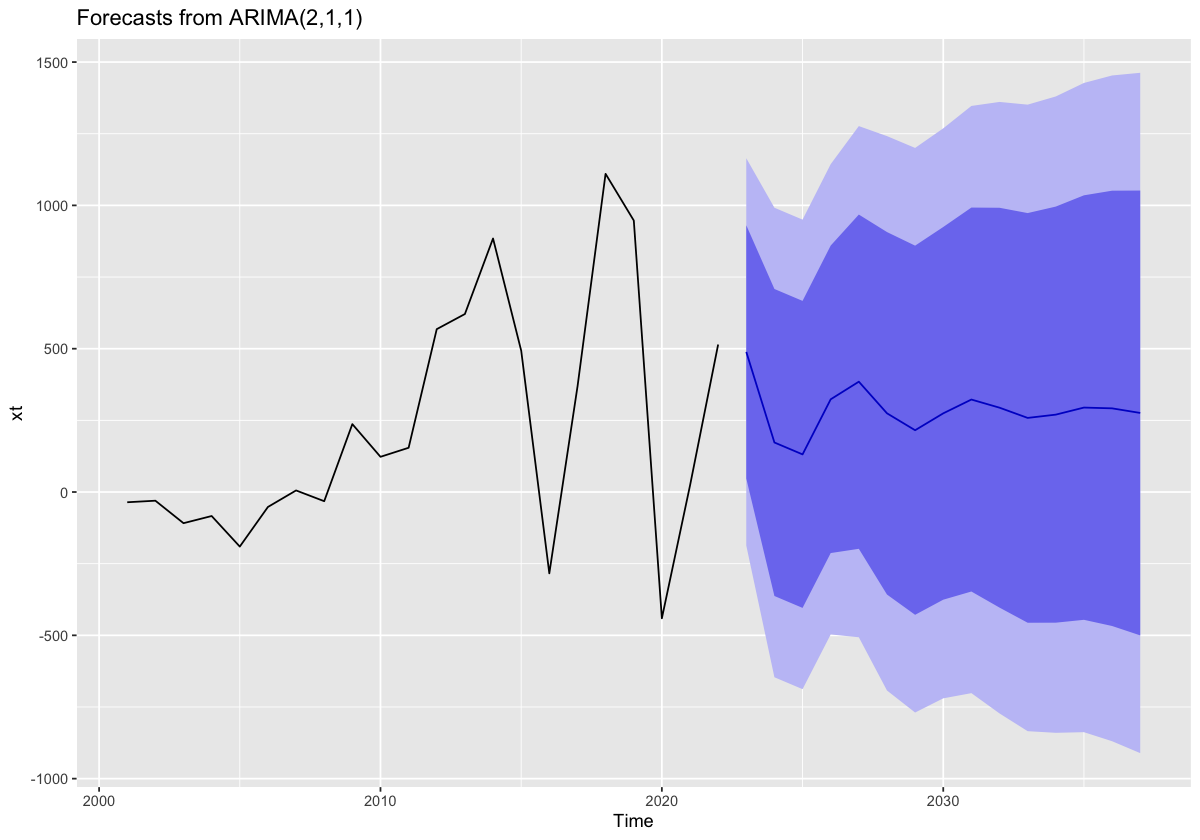

In [23]:
par(bg = "white")

autoplot(forecast_fit)